In [1]:
from rdkit.Chem import AllChem as Chem
import pandas as pd
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns
from matplotlib import pyplot as plt
%run ../utils/utils.py

RDKit WARNING: [13:08:25] WARNING: not removing hydrogen atom without neighbors
[13:08:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:25] WARNING: not removing hydrogen atom without neighbors
[13:08:25] WARNING: not removing hydrogen atom without neighbors
[13:08:25] WARNING: not removing hydrogen atom without neighbors
[13:08:25] WARNING: not removing hydrogen atom without neighbors
[13:08:25] WARNING: not removing hydrogen atom without neighbors
[13:08:25] WARNING: not removing hydrogen atom without neighbors
[13:08:25] WARNING: not removing hydrogen atom wit

RDKit WARNING: [13:08:27] WARNING: not removing hydrogen atom without neighbors
[13:08:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:27] WARNING: not removing hydrogen atom without neighbors
[13:08:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:27] WARNING: not removing hydrogen atom without 

RDKit WARNING: [13:08:30] WARNING: not removing hydrogen atom without neighbors
[13:08:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:30] WARNING: not removing hydrogen atom without neighbors
[13:08:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:30] WARNING: not removing hydrogen atom without 

RDKit WARNING: [13:08:31] WARNING: not removing hydrogen atom without neighbors
[13:08:31] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:32] WARNING: not removing hydrogen atom without neighbors
[13:08:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:32] WARNING: not removing hydrogen atom without neighbors
[13:08:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:32] WARNING: not removing hydrogen atom without neighbors
[13:08:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:0

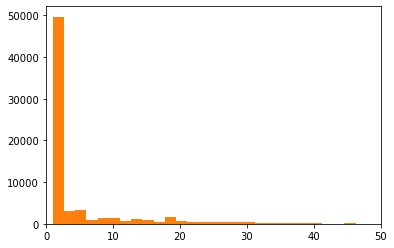

In [2]:
data = pd.read_csv("../data/carbon/carbon.tab", sep="\t", header =None).iloc[:,1].tolist()

sub_molecules = []
for smile in data:
    smile = Chem.MolToSmiles(Chem.MolFromSmiles(smile))
    smile = smile.replace("@", "")
    smile = smile.replace("\\", "")
    smile = smile.replace("/", "")
    sub_molecules.append(smile.split("."))


extracted_smiles = [smile for x in sub_molecules for smile in x]
len(extracted_smiles)


num_atoms = [Chem.MolFromSmiles(smile).GetNumAtoms() for smile in extracted_smiles]

plt.hist(num_atoms,200)
plt.xlim([0,50])


plt.hist(num_atoms,200)

mols_5_atoms = list(np.array(extracted_smiles)[(np.array(num_atoms)>=5) & (np.array(num_atoms)<20)])
mols_5_atoms = [Chem.MolToSmiles(Chem.MolFromSmiles(smile)) for smile in mols_5_atoms]

mols_5_atoms = pd.DataFrame(mols_5_atoms).drop_duplicates()
mols_5_atoms = mols_5_atoms.iloc[:,0].values.tolist() 


In [3]:
len(mols_5_atoms)

4709

In [4]:
dictionary = create_dict(mols_5_atoms)
dictionary

{'H': 0,
 ']': 1,
 '=': 2,
 'N': 3,
 '2': 4,
 '[': 5,
 'C': 6,
 '+': 7,
 'S': 8,
 'c': 9,
 '-': 10,
 '1': 11,
 'n': 12,
 '(': 13,
 ')': 14,
 'O': 15,
 'F': 16,
 'e': 17,
 'P': 18,
 '#': 19,
 'B': 20,
 '3': 21,
 '4': 22,
 'o': 23,
 'Cl': 24,
 'Br': 25,
 'I': 26,
 'Si': 27,
 'b': 28,
 'A': 29,
 's': 30,
 'G': 31,
 'l': 32,
 'r': 33,
 'W': 34,
 'g': 35,
 'Cr': 36,
 'M': 37,
 'p': 38,
 'R': 39,
 'h': 40,
 'u': 41,
 'a': 42,
 'T': 43,
 'i': 44}

In [7]:
atom_types_rm=["As", "Ge","Re","Se", "Fe","Sb", "Ge", "Pb","Hg", "Rh",
               "Ru", "W", "Ga","Ir", "Ta", "Mo", "Mn", "Pt", "Al", "Ni",
               "Bi", "Rh", "Pb" "Sb", "Te", "Sn"]

In [8]:
filterd_smiles = []
for smile in mols_5_atoms:
        if all([atom not in smile for atom in atom_types_rm]):
            filterd_smiles.append(smile)

In [9]:
len(mols_5_atoms)-len(filterd_smiles)

278

In [10]:
dictionary = create_dict(filterd_smiles)
dictionary

{'H': 0,
 ']': 1,
 '=': 2,
 'N': 3,
 '2': 4,
 '[': 5,
 'C': 6,
 '+': 7,
 'S': 8,
 'c': 9,
 '-': 10,
 '1': 11,
 'n': 12,
 '(': 13,
 ')': 14,
 'O': 15,
 'F': 16,
 'P': 17,
 '#': 18,
 'B': 19,
 '3': 20,
 '4': 21,
 'o': 22,
 'Cl': 23,
 'Br': 24,
 'I': 25,
 'Si': 26,
 's': 27,
 'Cr': 28,
 'p': 29}

In [11]:
tokenized_smiles = tokenize(filterd_smiles,dictionary)
tokenized_smiles

[[5, 8, 0, 4, 7, 1, 6, 2, 3, 6, 5, 8, 0, 4, 7, 1],
 [6, 9, 11, 9, 9, 9, 5, 9, 0, 10, 1, 11],
 [6,
  15,
  9,
  11,
  9,
  9,
  12,
  9,
  13,
  6,
  9,
  4,
  9,
  9,
  9,
  5,
  9,
  0,
  10,
  1,
  4,
  14,
  9,
  11],
 [6, 9, 11, 9, 9, 9, 9, 13, 6, 9, 4, 9, 9, 9, 5, 9, 0, 10, 1, 4, 14, 12, 11],
 [9, 11, 9, 9, 9, 13, 6, 9, 4, 9, 9, 9, 5, 9, 0, 10, 1, 4, 14, 12, 9, 11],
 [6,
  15,
  9,
  11,
  9,
  9,
  9,
  9,
  13,
  6,
  9,
  4,
  9,
  9,
  9,
  5,
  9,
  0,
  10,
  1,
  4,
  14,
  12,
  11],
 [16,
  6,
  13,
  16,
  14,
  13,
  16,
  14,
  9,
  11,
  9,
  9,
  9,
  13,
  6,
  9,
  4,
  9,
  9,
  9,
  5,
  9,
  0,
  10,
  1,
  4,
  14,
  12,
  9,
  11],
 [15,
  2,
  6,
  13,
  5,
  15,
  10,
  1,
  14,
  15,
  6,
  11,
  13,
  15,
  6,
  13,
  2,
  15,
  14,
  5,
  15,
  10,
  1,
  14,
  15,
  6,
  13,
  2,
  15,
  14,
  15,
  11],
 [6, 6, 3, 6, 6],
 [6, 6, 6, 13, 3, 14, 3, 13, 6, 14, 6],
 [6, 3, 13, 6, 14, 6, 6, 6, 3],
 [6, 6, 6, 3, 3, 13, 6, 14, 6],
 [15,
  2,
  6,
  13,
  6,
  2

In [12]:
token_lengths = np.array([len(x) for x in tokenized_smiles])

In [13]:
max(token_lengths)

61

In [14]:
np.sum(token_lengths>30)

742

In [15]:
filterd_smiles=np.array(filterd_smiles)[token_lengths<=30].tolist()

In [16]:
dictionary = create_dict(filterd_smiles)
dictionary

{'H': 0,
 ']': 1,
 '=': 2,
 'N': 3,
 '2': 4,
 '[': 5,
 'C': 6,
 '+': 7,
 'S': 8,
 'c': 9,
 '-': 10,
 '1': 11,
 'n': 12,
 '(': 13,
 ')': 14,
 'O': 15,
 'F': 16,
 'P': 17,
 '#': 18,
 'B': 19,
 '3': 20,
 '4': 21,
 'o': 22,
 'Cl': 23,
 'Br': 24,
 'I': 25,
 'Si': 26,
 's': 27,
 'Cr': 28,
 'p': 29}

In [17]:
tokenized_smiles = tokenize(filterd_smiles,dictionary)
tokenized_smiles

[[5, 8, 0, 4, 7, 1, 6, 2, 3, 6, 5, 8, 0, 4, 7, 1],
 [6, 9, 11, 9, 9, 9, 5, 9, 0, 10, 1, 11],
 [6,
  15,
  9,
  11,
  9,
  9,
  12,
  9,
  13,
  6,
  9,
  4,
  9,
  9,
  9,
  5,
  9,
  0,
  10,
  1,
  4,
  14,
  9,
  11],
 [6, 9, 11, 9, 9, 9, 9, 13, 6, 9, 4, 9, 9, 9, 5, 9, 0, 10, 1, 4, 14, 12, 11],
 [9, 11, 9, 9, 9, 13, 6, 9, 4, 9, 9, 9, 5, 9, 0, 10, 1, 4, 14, 12, 9, 11],
 [6,
  15,
  9,
  11,
  9,
  9,
  9,
  9,
  13,
  6,
  9,
  4,
  9,
  9,
  9,
  5,
  9,
  0,
  10,
  1,
  4,
  14,
  12,
  11],
 [16,
  6,
  13,
  16,
  14,
  13,
  16,
  14,
  9,
  11,
  9,
  9,
  9,
  13,
  6,
  9,
  4,
  9,
  9,
  9,
  5,
  9,
  0,
  10,
  1,
  4,
  14,
  12,
  9,
  11],
 [6, 6, 3, 6, 6],
 [6, 6, 6, 13, 3, 14, 3, 13, 6, 14, 6],
 [6, 3, 13, 6, 14, 6, 6, 6, 3],
 [6, 6, 6, 3, 3, 13, 6, 14, 6],
 [15,
  2,
  6,
  13,
  6,
  2,
  6,
  13,
  15,
  14,
  6,
  13,
  16,
  14,
  13,
  16,
  14,
  16,
  14,
  6,
  13,
  16,
  14,
  13,
  16,
  14,
  16],
 [6, 6, 13, 2, 15, 14, 6, 2, 6, 13, 15, 14, 6, 13, 16, 1

In [18]:
token_lengths = np.array([len(x) for x in tokenized_smiles])
max_length=max(token_lengths)
max_length

30

In [20]:
dictionary = create_dict(filterd_smiles, add_tokens =True)
dictionary

{'<sos>': 0,
 '<eos>': 1,
 '<pad>': 2,
 'C': 3,
 ']': 4,
 'H': 5,
 '=': 6,
 '2': 7,
 '[': 8,
 'N': 9,
 '+': 10,
 'S': 11,
 'c': 12,
 '-': 13,
 '1': 14,
 'n': 15,
 '(': 16,
 ')': 17,
 'O': 18,
 'F': 19,
 'P': 20,
 '#': 21,
 'B': 22,
 '3': 23,
 '4': 24,
 'o': 25,
 'Cl': 26,
 'Br': 27,
 'I': 28,
 'Si': 29,
 's': 30,
 'Cr': 31,
 'p': 32}

In [21]:
tokenized_smiles = tokenize(filterd_smiles,dictionary,add_tokens=True )
tokenized_smiles[:2]

[[0, 8, 11, 5, 7, 10, 4, 3, 6, 9, 3, 8, 11, 5, 7, 10, 4, 1],
 [0, 3, 12, 14, 12, 12, 12, 8, 12, 5, 13, 4, 14, 1]]

In [22]:
for i, tok_smi in enumerate(tokenized_smiles):
    tokenized_smiles[i] = tok_smi+ [dictionary["<pad>"]]*(max_length - token_lengths[i])

In [23]:
tokenized_smiles=torch.tensor(tokenized_smiles, dtype=torch.long)
tokenized_smiles

tensor([[ 0,  8, 11,  ...,  2,  2,  2],
        [ 0,  3, 12,  ...,  2,  2,  2],
        [ 0,  3, 18,  ...,  2,  2,  2],
        ...,
        [ 0,  3,  3,  ..., 14,  1,  2],
        [ 0, 18,  6,  ...,  2,  2,  2],
        [ 0,  3,  3,  ...,  2,  2,  2]])

In [24]:
encoder = nn.Sequential(nn.Embedding(36,32))

In [102]:
class Encoder(nn.Module):
    def __init__(self, input_dim, emb_dim, hid_dim, dropout):
        super().__init__()

        self.hid_dim = hid_dim
        
        self.embedding = nn.Embedding(input_dim, emb_dim,  padding_idx=2) #no dropout as only one layer!
        
        self.rnn = nn.GRU(emb_dim, hid_dim)
        
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        embedded = self.dropout(self.embedding(x))
        embedded = embedded.permute(1,0,2)
        _ , hidden = self.rnn(embedded)
        return hidden

In [103]:
class Decoder(nn.Module):
    def __init__(self, output_dim, emb_dim, hid_dim, dropout):
        super().__init__()

        self.hid_dim = hid_dim
        self.output_dim = output_dim
        
        self.embedding = nn.Embedding(output_dim, emb_dim,padding_idx=2)
        
        self.rnn = nn.GRU(emb_dim + hid_dim, hid_dim)
        
        self.fc_out = nn.Linear(emb_dim + hid_dim * 2, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, input, hidden, context):
        
        input = input.unsqueeze(1)
        
        embedded = self.dropout(self.embedding(input))
        embedded = embedded.permute(1,0,2)        
        emb_con = torch.cat((embedded, context), dim = 2)
            
        output, hidden = self.rnn(emb_con, hidden)
        
        output = torch.cat((embedded.squeeze(0), hidden.squeeze(0), context.squeeze(0)), 
                           dim = 1)
        
        prediction = self.fc_out(output)
        
        return prediction, hidden
    
    

In [104]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
        
        assert encoder.hid_dim == decoder.hid_dim, \
            "Hidden dimensions of encoder and decoder must be equal!"
        
    def forward(self, src, trg, teacher_forcing_ratio = 0.5):
   
        
        batch_size = trg.shape[0]
        trg_len = trg.shape[1]
        trg_vocab_size = self.decoder.output_dim
        outputs = torch.zeros(trg_len, batch_size, trg_vocab_size).to(self.device)
        
        context = self.encoder(src)
        
        hidden = context
        
        input = trg[:,0]
        
        for t in range(1, trg_len):
    
            output, hidden = self.decoder(input, hidden, context)
            
            #place predictions in a tensor holding predictions for each token
            outputs[t] = output
            
            #decide if we are going to use teacher forcing or not
            teacher_force = random.random() < teacher_forcing_ratio
            
            #get the highest predicted token from our predictions
            top1 = output.argmax(1) 
            
            #if teacher forcing, use actual next token as next input
            #if not, use predicted token
            input = trg[:,t] if teacher_force else top1

        return outputs

In [158]:
enc = Encoder(len(dictionary), 128, 256, 0.2)
dec = Decoder(len(dictionary),128,256,0.2)
model = Seq2Seq(enc, dec, "cpu")

In [159]:
train_dataset = TensorDataset(tokenized_smiles, tokenized_smiles)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
ex_in, ex_out = next(iter(train_loader))

In [160]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_funktion = nn.CrossEntropyLoss(ignore_index = dictionary["<pad>"])

In [147]:
for epoch in range(30):
    model.train()
    epoch_loss = 0

    for input_seq, output_seq in train_loader:

        optimizer.zero_grad()

        output = model(input_seq, output_seq)
        output_dim = output.shape[-1]

        output = output[1:].view(-1, output_dim)
        output_seq = output_seq[:,1:].reshape(-1)
        loss = loss_funktion(output, output_seq)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch {epoch}: Loss: {epoch_loss / len(train_loader)}")

KeyboardInterrupt: 

In [171]:
for epoch in range(100):
    model.train()
    epoch_loss = 0
    input_seq = ex_in[:2]
    output_seq = ex_in[:2]
    for p in range(20):

        optimizer.zero_grad()

        output = model(input_seq, output_seq, 0.1)
        output_dim = output.shape[-1]

        output = output[1:].view(-1, output_dim)
        output_seq_r = output_seq[:,1:].reshape(-1)
        loss = loss_funktion(output, output_seq_r)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch {epoch}: Loss: {epoch_loss /20}")

Epoch 0: Loss: 0.0002269722637720406
Epoch 1: Loss: 0.00025252120685763656
Epoch 2: Loss: 0.0002766033932857681
Epoch 3: Loss: 0.00023943183332448826
Epoch 4: Loss: 0.0002204503703978844
Epoch 5: Loss: 0.00021332946635084228
Epoch 6: Loss: 0.00022902209384483284
Epoch 7: Loss: 0.00020519920435617677
Epoch 8: Loss: 0.00018438004626659678
Epoch 9: Loss: 0.0001845354687247891
Epoch 10: Loss: 0.00020704179696622304
Epoch 11: Loss: 0.00023022626774036326
Epoch 12: Loss: 0.0001809140194382053
Epoch 13: Loss: 0.00023149009502958505
Epoch 14: Loss: 0.00023286933719646186
Epoch 15: Loss: 0.00020835493523918558
Epoch 16: Loss: 0.00017764796211849898
Epoch 17: Loss: 0.0001802603317628382
Epoch 18: Loss: 0.00019080739002674818
Epoch 19: Loss: 0.00020246922249498312
Epoch 20: Loss: 0.00017446405909140594
Epoch 21: Loss: 0.00017344488915114198
Epoch 22: Loss: 0.000174052435613703
Epoch 23: Loss: 0.0001635319356864784
Epoch 24: Loss: 0.00016579364382778293
Epoch 25: Loss: 0.00016468344074382912
Epoch

In [173]:
model.eval()

Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(33, 128, padding_idx=2)
    (rnn): GRU(128, 256)
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (decoder): Decoder(
    (embedding): Embedding(33, 128, padding_idx=2)
    (rnn): GRU(384, 256)
    (fc_out): Linear(in_features=640, out_features=33, bias=True)
    (dropout): Dropout(p=0.2, inplace=False)
  )
)

In [174]:
pred = model(ex_in[:2], ex_in[:2], 0.)

In [175]:
torch.argmax(pred,2).t()

tensor([[ 0,  3,  3,  6, 17,  3, 13,  8,  5,  4, 16, 18, 18,  1,  1,  3,  3,  3,
          7,  8,  5,  8,  5,  3,  6, 17,  6, 12, 12, 12, 12,  1],
        [ 0, 18, 16, 18,  8,  5,  4,  3, 13,  3,  6, 17,  3,  8,  8,  8,  8,  5,
          4,  3,  4,  3,  4, 16, 18,  3,  3, 14, 12, 12, 14, 14]])

In [170]:
ex_in[:2]

tensor([[ 0,  3, 18,  3, 16,  6, 18, 17,  8,  3,  5, 13,  4,  8,  3,  5, 13,  4,
          3, 16,  6, 18, 17, 18,  3,  1,  2,  2,  2,  2,  2,  2],
        [ 0,  8,  3,  5,  7,  4,  8,  3,  5,  4,  8,  3,  5,  4,  3, 16,  6, 18,
         17,  3,  6,  3, 12, 14, 12, 12, 12, 12, 12, 14,  1,  2]])

In [176]:
dictionary

{'<sos>': 0,
 '<eos>': 1,
 '<pad>': 2,
 'C': 3,
 ']': 4,
 'H': 5,
 '=': 6,
 '2': 7,
 '[': 8,
 'N': 9,
 '+': 10,
 'S': 11,
 'c': 12,
 '-': 13,
 '1': 14,
 'n': 15,
 '(': 16,
 ')': 17,
 'O': 18,
 'F': 19,
 'P': 20,
 '#': 21,
 'B': 22,
 '3': 23,
 '4': 24,
 'o': 25,
 'Cl': 26,
 'Br': 27,
 'I': 28,
 'Si': 29,
 's': 30,
 'Cr': 31,
 'p': 32}